In [3]:
import apyori

In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [5]:
#df = pd.read_csv('./events.csv', sep=',')
import os
import sys
print(os.listdir('./'))
print(os.listdir('../../data'))

['.Trash-0', '.ipynb_checkpoints', 'dfs_list.csv', 'Untitled.ipynb', 'InstARL.ipynb']
['apyori_inst_spb003092.csv', 'instagram_posts', 'apyori_inst_spb00035.csv', 'apyori_inst_spbf.csv', 'apyori_inst_spb00031.csv', 'apyori_inst_spb0004.csv', 'apyori_inst_spb003095.csv', 'spb_posts_2019.csv', 'kudago_data', 'apyori_inst_spb003091.csv', 'apyori_inst_spb0005.csv', 'apyory']


# FOR SPB 2019

In [6]:
df0 = pd.read_csv('../../data/spb_posts_2019.csv', sep=',')

In [7]:
df = df0

In [8]:
def change_endline(x):
    return x.replace('\n',' ')

def extract_hashtags(x):
    x = x.replace('#', ' #')
    tags = re.findall(r'(#\S+?)\s', x)
    #tags = set(re.findall(r'(#\S+?)\s', x)) #exclude the same tags
    #normalize hashtags
    return tags if len(tags) else np.nan

def prepare_db(df):
    df = df.dropna()
    df['caption'] = df['caption'].apply(change_endline)
    df['hashtags'] = df['caption'].apply(extract_hashtags)
    df = df.dropna()
    return df

In [9]:
# we have only posts with hashtags
df = prepare_db(df)
df

<ipython-input-8-417349c8d962>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['caption'] = df['caption'].apply(change_endline)
<ipython-input-8-417349c8d962>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hashtags'] = df['caption'].apply(extract_hashtags)


,id,shortcode,imageurl,isvideo,caption,commentscount,timestamp,likescount,isad,authorid,locationid,lat,lon,hashtags
0,2100487392867125154,B0mbierCAei,https://scontent-dfw5-1.cdninstagram.com/v/t51...,f,DEATH 💀GUITARIST 🎸DANCING 💃 UNIQUE CONTENT 🔥 М...,3,1564617631,50,f,2895837725,409734806,60.002420,30.296490,"[#мертвый, #гитарист, #гитара, #прыгун, #death..."
3,2101062776215474217,B0oeXaLHpAp,https://scontent-dfw5-2.cdninstagram.com/v/t51...,f,Мои девочки 💛❤️💜 Такие редкие и долгожданные в...,3,1564686222,74,f,654993988,1020316384,59.957330,30.297810,[#13летвместе]
5,2100490830881135651,B0mcUgkopwj,https://scontent-dfw5-1.cdninstagram.com/v/t51...,f,Мы с Петром проверяем кто во сколько просыпает...,4,1564618041,144,f,208777983,1991970784229637,59.950163,30.315356,[#ставьлайк]
7,2100301459588903831,B0lxQy0B_OX,https://scontent-sea1-1.cdninstagram.com/v/t51...,t,MarkHockey - территория вратарей! 👍🏻 По вопрос...,5,1564634856,188,f,1099063802,411430829,59.921501,30.467902,"[#markhockey, #mh, #markwear, #hockey, #khl, #..."
8,2100489264618828711,B0mb9t4IHOn,https://scontent-dfw5-2.cdninstagram.com/v/t51...,f,#детали #единорог #единорогпиньята #единорожка...,0,1564617854,7,f,180487090,594287207,59.877330,30.318980,"[#детали, #единорог, #единорогпиньята, #единор..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7759923,2031253672851326072,BwwdnQTAsR4,https://scontent-dfw5-2.cdninstagram.com/v/t51...,f,"💛Питер... как это не странно, но я уже скучаю....",5,1556364328,127,f,641568821,226091755,59.971781,30.259442,"[#санктпетербург, #скучаюспб, #питер, #крестов..."
7759926,2031206110870801771,BwwSzIwDo1r,https://scontent-dfw5-2.cdninstagram.com/v/t51...,f,Коротко и ёмко об идеальной субботе. #СанктПет...,2,1556358659,43,f,306906698,226091755,59.971781,30.259442,"[#СанктПетербург, #крестовский, #выходные, #су..."
7759927,2031151080009010240,BwwGSVRFoxA,https://scontent-dfw5-2.cdninstagram.com/v/t51...,f,СЦЕНАРИИ МОЕЙ МЕЧТЫ ⭐️ ⭐️ Сегодня на своём онл...,93,1556352098,1758,f,1930430096,226091755,59.971781,30.259442,"[#коучспб, #психологонлайн, #софиявеларди, #за..."
7759928,2031118233699991176,Bwv-0Wwgb6I,https://scontent-dfw5-1.cdninstagram.com/v/t51...,f,"Доброе субботнее утро 🌞 ,Красотки 👑 ⠀ В прошлы...",91,1556348183,2215,f,5885545914,226091755,59.971781,30.259442,"[#dragonmask_enjoli, #enjoli, #маскадлялица, #..."


In [10]:
transactions = df['hashtags'].tolist()
post_count = df.shape[0]

In [11]:
def do_apriori(transactions, support, confidence = 0.75, lift = 1.2):
    result = list(apyori.apriori(transactions, min_support=support, min_confidence=confidence, min_lift=lift, min_length = 2))
    temp = []
    for i in range(len(result)):
      temp.append([list(result[i][0]), result[i][1], result[i][2][0][2], result[i][2][0][3]])
    result_df = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
    try:
        tags_set = set(result_df['items'].sum())
    except:
        tags_set = 0
    return result_df, tags_set

In [12]:
def delete_tags(df, tags, original_post_count):
    def _delete_tags(x):
        # set of post hastags - set of adv hastags
        new_x = set(x) - tags
        return new_x if len(new_x) else np.nan
    df['hashtags'] = df['hashtags'].apply(_delete_tags)
    prev_shape = df.shape[0]
    df = df.dropna()
    new_shape = df.shape[0]
    print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/original_post_count)
    return df

# Apriori with preset step for min support

In [22]:
import time

In [24]:
import signal
from contextlib import contextmanager

class TimeoutException(Exception): pass

@contextmanager
def time_limit(seconds):
    def signal_handler(signum, frame):
        raise TimeoutException("Timed out!")
    signal.signal(signal.SIGALRM, signal_handler)
    signal.alarm(seconds)
    try:
        yield
    finally:
        signal.alarm(0)

In [29]:
step_val_original = 0.0001
step_val = step_val_original

supp = 0.004
starting_point = time.time()
dfs_list = list()

# stopping condition? 
while supp > 0.0005:
    supp -= step_val
    
    time_start = time.time()
    try:
        with time_limit(300):
            result_df, tags = do_apriori(transactions, supp)
    except TimeoutException as e:
        print("Timed out!")
        print('old support:', supp, 'step was', step_val)
        supp += step_val
        step_val = step_val/10
        print('new support:', supp, 'new step', step_val)
        continue
        
    dfs_list.append(result_df)
    if tags:
        df = delete_tags(df, tags, post_count)
        transactions = df['hashtags'].tolist()
    
    step_val = step_val_original
    print('for support ', supp, ':', time.time() - time_start, ' seconds')
    print('count of found rules:', result_df.shape[0])
    
print('total time', time.time() - starting_point)

25380  posts were deleted, percentage: 0.007313495069730343
for support  0.0039000000000000003 : 78.76271295547485  seconds
count of found rules: 20
for support  0.0038000000000000004 : 48.01353073120117  seconds
count of found rules: 0
for support  0.0037000000000000006 : 56.13253831863403  seconds
count of found rules: 0


<ipython-input-21-cd39839da4f1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hashtags'] = df['hashtags'].apply(_delete_tags)


212  posts were deleted, percentage: 6.108987213486339e-05
for support  0.0036000000000000008 : 69.29469394683838  seconds
count of found rules: 4
for support  0.003500000000000001 : 63.188048362731934  seconds
count of found rules: 0
34  posts were deleted, percentage: 9.797432323515826e-06
for support  0.003400000000000001 : 67.82536625862122  seconds
count of found rules: 2
31  posts were deleted, percentage: 8.932953000852664e-06
for support  0.0033000000000000013 : 73.24260091781616  seconds
count of found rules: 1
397  posts were deleted, percentage: 0.00011439943036575832
for support  0.0032000000000000015 : 77.1400203704834  seconds
count of found rules: 5
10770  posts were deleted, percentage: 0.0031034807683607483
for support  0.0031000000000000016 : 256.58605337142944  seconds
count of found rules: 1013
for support  0.003000000000000002 : 64.737957239151  seconds
count of found rules: 0
488  posts were deleted, percentage: 0.0001406219698198742
for support  0.002900000000000

In [30]:
# попробовать то же самое, но без удаление, а переименованием
dataframes = pd.concat(dfs_list)
dataframes.to_csv('dfs_list.csv')

# Apriori with preset step for min supporе (with rename function)

In [13]:
import time

In [14]:
import signal
from contextlib import contextmanager

class TimeoutException(Exception): pass

@contextmanager
def time_limit(seconds):
    def signal_handler(signum, frame):
        raise TimeoutException("Timed out!")
    signal.signal(signal.SIGALRM, signal_handler)
    signal.alarm(seconds)
    try:
        yield
    finally:
        signal.alarm(0)

In [15]:
uniq_num = 0

In [16]:
def _rename_tags(x, tags):
    global uniq_num
    x = set(x)
    for tag in tags:
        if tag in x:
            x.remove(tag)
            x.add('renamed_tag' + str(uniq_num))
            uniq_num = uniq_num + 1
    return x

def rename_tags(_df, tags):
    global uniq_num
    old_num = uniq_num
    _df['hashtags'] = _df['hashtags'].apply(_rename_tags, args=(tags, ))
    print(uniq_num - old_num, ' were renamed to unique names')
    return _df

In [17]:
step_val_original = 0.0001
step_val = step_val_original

supp = 0.004
starting_point = time.time()
dfs_list = list()
supp_list = list()

# stopping condition? 
while supp > 0.0001:
    supp -= step_val
    
    time_start = time.time()
    try:
        with time_limit(300):
            result_df, tags = do_apriori(transactions, supp)
    except TimeoutException as e:
        print("Timed out!")
        supp += step_val
        step_val = step_val/10
        print('new support:', supp, 'new step', step_val)
        continue
        
    dfs_list.append(result_df)
    supp_list.append(supp)
    if tags:
        df = rename_tags(df, tags)
        transactions = df['hashtags'].tolist()
    
    step_val = step_val_original
    print('for support ', supp, ':', time.time() - time_start, ' seconds')
    print('count of found rules:', result_df.shape[0])
    
print('total time', time.time() - starting_point)

1882317  were renamed to unique names
for support  0.0039000000000000003 : 103.08285689353943  seconds
count of found rules: 20
for support  0.0038000000000000004 : 88.43804597854614  seconds
count of found rules: 0
for support  0.0037000000000000006 : 82.53218388557434  seconds
count of found rules: 0
103991  were renamed to unique names
for support  0.0036000000000000008 : 92.39466071128845  seconds
count of found rules: 3
for support  0.003500000000000001 : 70.32949829101562  seconds
count of found rules: 0
75511  were renamed to unique names
for support  0.003400000000000001 : 95.50443434715271  seconds
count of found rules: 2
27005  were renamed to unique names
for support  0.0033000000000000013 : 95.23887896537781  seconds
count of found rules: 1
29741  were renamed to unique names
for support  0.0032000000000000015 : 101.0592999458313  seconds
count of found rules: 1
258324  were renamed to unique names
for support  0.0031000000000000016 : 99.13325238227844  seconds
count of fou

KeyboardInterrupt: 

In [40]:
supports_df = pd.DataFrame(supp_list, columns=['support'])
supports_df.to_csv('supp_list_rename.csv')

In [26]:
dfs_lists_not_empty = list()
for it in dfs_list:
    if it.shape[0] != 0:
        dfs_lists_not_empty.append(it)

In [41]:
dataframes = pd.concat(dfs_lists_not_empty)
dataframes.to_csv('dfs_list_rename.csv')

creating plots

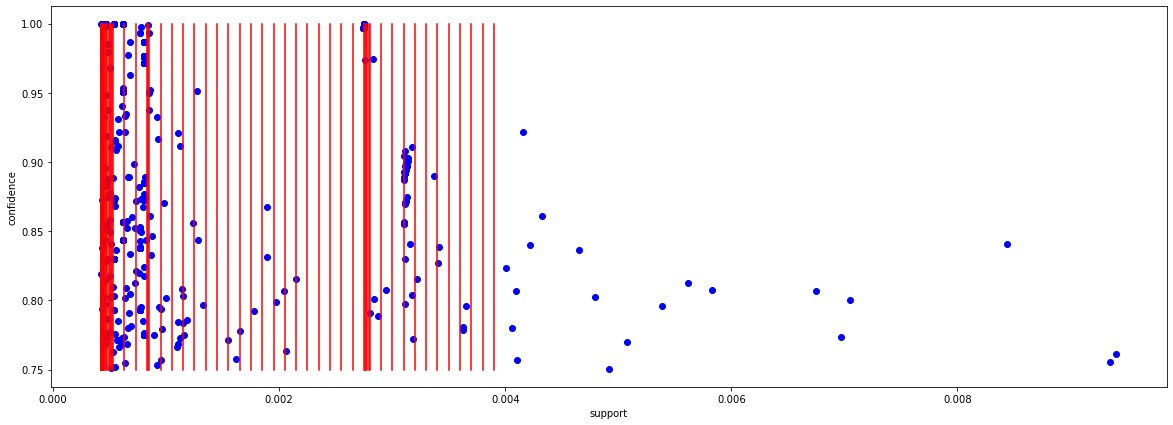

In [44]:
plt.figure(figsize=(20, 7))
ax = plt.axes()
ax.scatter(dataframes['support'], dataframes['confidence'], c='blue')

for sup in supp_list:
    ax.plot([sup, sup], [0.75, 1], c='red')

ax.set_xlabel('support')
ax.set_ylabel('confidence')
plt.show()

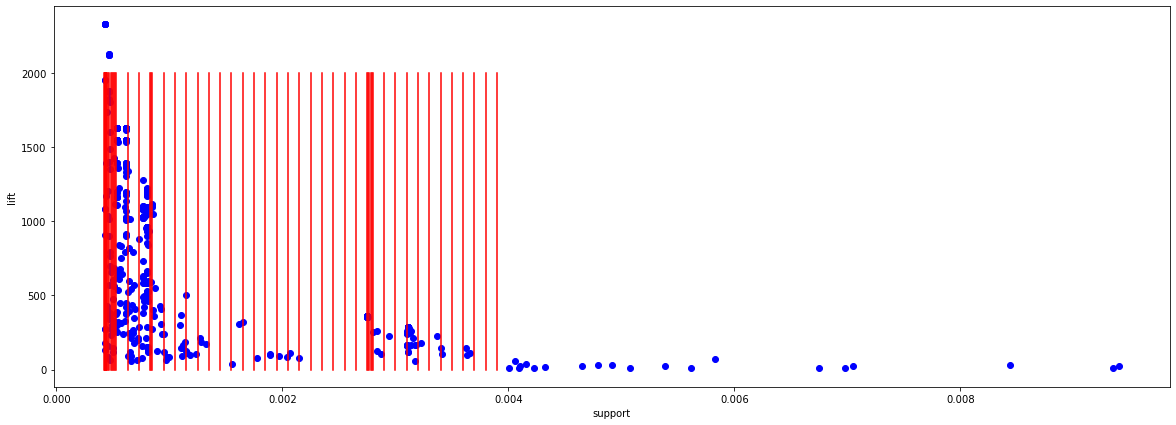

In [47]:
plt.figure(figsize=(20, 7))
ax = plt.axes()
ax.scatter(dataframes['support'], dataframes['lift'], c='blue')

for sup in supp_list:
    ax.plot([sup, sup], [0, 2000], c='red')

ax.set_xlabel('support')
ax.set_ylabel('lift')
plt.show()

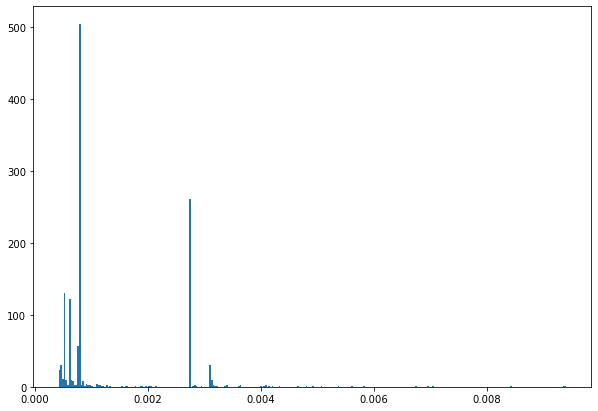

In [54]:
plt.figure(figsize=(10, 7))
ax = plt.axes()
ax.hist(dataframes['support'], bins = 300)
#for sup in supp_list:
#    ax.plot([sup, sup], [0, 500], c='red')

plt.show()

# Apriori with empirically found steps

In [ ]:
%%time
#0.003092 - original (5 mins)
result_df, tags = do_apriori(transactions, 0.003092)

In [ ]:
df = delete_tags(df, tags, post_count)

Now min_support is less than before, so we can find more sensitive rules

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
#0.0028 - 1 min
#0.002783 - 1 min
#0.0027825 - 1.5 min
#0.0027823 - 4 mins
result_df2, tags2 = do_apriori(transactions, 0.0027823)

In [ ]:
df = delete_tags(df, tags2, post_count)

Постов, которые содержали только эти хэштеги мало. Возможно, имеет смысл удалять любые, которые содержат хотя бы n штук из перечня, чтоб была возможность контролировать чувствительность.

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
#0.0027823 - 1 min
#0.0026 - 1.5 - new 120 entries
result_df3, tags3 = do_apriori(transactions, 0.0025)

In [ ]:
df = delete_tags(df, tags3, post_count)

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
#0.001 - 2 min
result_df4, tags4 = do_apriori(transactions, 0.001)

In [ ]:
df = delete_tags(df, tags4, post_count)

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
#0.001 - 2 min
result_df5, tags5 = do_apriori(transactions, 0.0009)

In [ ]:
df = delete_tags(df, tags5, post_count)

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
#0.001 - 2 min
result_df6, tags6 = do_apriori(transactions, 0.0008)

In [ ]:
df = delete_tags(df, tags6, post_count)

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
#0.001 - 2 min
result_df7, tags7 = do_apriori(transactions, 0.0006)

In [ ]:
df = delete_tags(df, tags7, post_count)

Plots creating

In [ ]:
spb_rules_df =  pd.concat([result_df, result_df2, result_df3, result_df4, result_df5, result_df6, result_df7])

In [ ]:
spb_rules_df.sort_values(by=['support'])

In [ ]:
# support cuts: 0.003092, 0.0027823, 0.0025, 0.001, 0.0009, 0.0008, 0.0006

In [ ]:
plt.figure(figsize=(10, 7))
ax = plt.axes()
ax.scatter(spb_rules_df['support'], spb_rules_df['confidence'], c='blue')

for sup in [0.003092, 0.0027823, 0.0025, 0.001, 0.0009, 0.0008, 0.0006]:
    ax.plot([sup, sup], [0.75, 1], c='red')

    ax.set_xlabel('support')
ax.set_ylabel('confidence')
plt.show()

In [ ]:
plt.figure(figsize=(10, 7))
ax = plt.axes()
ax.scatter(spb_rules_df['support'], spb_rules_df['lift'], c='blue')

for sup in [0.003092, 0.0027823, 0.0025, 0.001, 0.0009, 0.0008, 0.0006]:
    ax.plot([sup, sup], [0, 1600], c='red')

    ax.set_xlabel('support')
ax.set_ylabel('confidence')
plt.show()

In [ ]:
plt.figure(figsize=(10, 7))
ax = plt.axes()
for sup in [0.003092, 0.0027823, 0.0025, 0.001, 0.0009, 0.0008, 0.0006]:
    ax.plot([sup, sup], [0, 4000], c='red')
ax.hist(spb_rules_df['support'], bins = 300)
plt.show()

SPb analysis, but with tags renaming to save support values for different apriori launches

In [8]:
transactions = df['hashtags'].tolist()
post_count = df.shape[0]

In [15]:
%%time
#0.003092 - original (5 mins)
result_df, tags = do_apriori(transactions, 0.003092)

CPU times: user 5min 17s, sys: 4.77 s, total: 5min 21s
Wall time: 5min 22s


In [32]:
uniq_num = 0

In [55]:
def _rename_tags(x, tags):
    global uniq_num
    x = set(x)
    for tag in tags:
        if tag in x:
            x.remove(tag)
            x.add('renamed_tag' + str(uniq_num))
            uniq_num = uniq_num + 1
    return x

def rename_tags(_df, tags):
    global uniq_num
    old_num = uniq_num
    _df['hashtags'] = _df['hashtags'].apply(_rename_tags, args=(tags, ))
    print(uniq_num - old_num, ' were renamed to unique names')
    return _df

In [34]:
df.loc[8]['hashtags']

['#детали',
 '#единорог',
 '#единорогпиньята',
 '#единорожка',
 '#еждинорогпиньятаспб',
 '#заказпиньят',
 '#пиньята',
 '#пиньятаспб',
 '#пиньятаединорож',
 '#спб',
 '#санктпетербург',
 '#чтоподарить',
 '#заказ',
 '#подарок']

In [35]:
df = rename_tags(df, tags)

2516830  were renamed to unique names


In [36]:
df.loc[8]['hashtags']

{'#детали',
 '#единорог',
 '#единорогпиньята',
 '#единорожка',
 '#еждинорогпиньятаспб',
 '#заказ',
 '#заказпиньят',
 '#пиньята',
 '#пиньятаединорож',
 '#пиньятаспб',
 '#подарок',
 '#чтоподарить',
 'renamed_tag0',
 'renamed_tag1'}

In [37]:
transactions = df['hashtags'].tolist()

In [38]:
%%time
result_df2, tags2 = do_apriori(transactions, 0.0027823)

CPU times: user 1min 49s, sys: 8.86 s, total: 1min 57s
Wall time: 1min 58s


In [56]:
df = rename_tags(df, tags2)

108216  were renamed to unique names


In [57]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
result_df3, tags3 = do_apriori(transactions, 0.0027)

In [61]:
tags3

NameError: name 'tags3' is not defined

In [59]:
df = rename_tags(df, tags3)

NameError: name 'tags3' is not defined

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
result_df4, tags4 = do_apriori(transactions, 0.001)

In [ ]:
df = rename_tags(df, tags4)

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
result_df5, tags5 = do_apriori(transactions, 0.0009)

In [ ]:
df = rename_tags(df, tags5)

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
result_df6, tags6 = do_apriori(transactions, 0.0008)

In [ ]:
df = rename_tags(df, tags6)

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
result_df7, tags7 = do_apriori(transactions, 0.0006)

In [ ]:
df = rename_tags(df, tags7)

### LONDON 2019

In [ ]:
df_london = pd.read_csv('../../data/instagram_posts/london_posts_2019.csv', sep=',')
df = df_london
df

In [ ]:
df = df.dropna()
df['caption'] = df['caption'].apply(change_endline)
df['hashtags'] = df['caption'].apply(extract_hashtags)
df = df.dropna()

In [ ]:
transactions = df['hashtags'].tolist()
post_count = df.shape[0]
transactions[1:4]

layer 1

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.004, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_london = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_london.sort_values(by=['confidence'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_london['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)

layer 2

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.002, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_london = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_london.sort_values(by=['confidence'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_london['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)

layer 3

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.001, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_london = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_london.sort_values(by=['support'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_london['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)

layer 4

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.0005, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_london = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_london.sort_values(by=['confidence'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_london['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)

# MOSCOW 2019

In [ ]:
df_moscow = pd.read_csv('../../data/instagram_posts/moscow_posts_2019.csv', sep=',')
df = df_moscow
df

In [ ]:
df = df.dropna()
df['caption'] = df['caption'].apply(change_endline)
df['hashtags'] = df['caption'].apply(extract_hashtags)
df = df.dropna()
transactions = df['hashtags'].tolist()
post_count = df.shape[0]
transactions[1:4]

layer 1

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.003, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_moscow = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_moscow.sort_values(by=['confidence'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_moscow['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)

layer 2

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.002, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_moscow = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_moscow.sort_values(by=['confidence'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_moscow['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)

layer 3

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.001, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_moscow = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_moscow.sort_values(by=['confidence'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_moscow['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)

layer 4

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.0009, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_moscow = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_moscow.sort_values(by=['confidence'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_moscow['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)

# NYC 2019

In [ ]:
df_nyc = pd.read_csv('../../data/instagram_posts/nyc_posts_2019.csv', sep=',')
df = df_nyc
df

In [ ]:
df = df.dropna()
df['caption'] = df['caption'].apply(change_endline)
df['hashtags'] = df['caption'].apply(extract_hashtags)
df = df.dropna()
transactions = df['hashtags'].tolist()
post_count = df.shape[0]
transactions[1:4]

layer 1

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.004, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_moscow = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_moscow.sort_values(by=['confidence'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_moscow['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)

layer 2

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.002, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_moscow = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_moscow.sort_values(by=['confidence'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_moscow['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)

layer 3

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.001, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_moscow = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_moscow.sort_values(by=['confidence'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_moscow['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)

layer 4

In [ ]:
transactions = df['hashtags'].tolist()

In [ ]:
%%time
# min support is foind iteratively to prevent large computations
result8 = list(apyori.apriori(transactions, min_support = 0.0009, min_confidence = 0.75, min_lift = 1.2, min_length = 2))

In [ ]:
temp = []
for i in range(len(result8)):
  temp.append([list(result8[i][0]), result8[i][1], result8[i][2][0][2], result8[i][2][0][3]])

apyori_inst_moscow = pd.DataFrame(temp, columns = ['items', 'support', 'confidence', 'lift'])
apyori_inst_moscow.sort_values(by=['confidence'], ascending=False)

In [ ]:
adv_tags = set(apyori_inst_moscow['items'].sum())
df['hashtags'] = df['hashtags'].apply(delete_adv)
adv_tags

In [ ]:
prev_shape = df.shape[0]
df = df.dropna()
new_shape = df.shape[0]
print(prev_shape - new_shape, ' posts were deleted, percentage:', (prev_shape - new_shape)/post_count)